In [6]:
# how to set to GPU***

import numpy as np
import pandas as pd
import os
import tensorflow as tf
import wandb
import fastai.vision.all
import sys

from glob import glob
from os import walk

In [7]:
def file_loader():
    path = 'petfinder-pawpularity-score/'

    train_df = pd.read_csv(path + 'train.csv')
    test_df = pd.read_csv(path + 'test.csv')
    train_jpg = glob(path + "train/*.jpg")
    test_jpg = glob(path + "test/*.jpg")

    print('test_jpg is of type ', type(test_jpg[0]), ' and length ', len(test_jpg))
    print(test_jpg[0])
    return train_df, test_df, train_jpg, train_df, path

test_jpg is of type  <class 'str'>  and length  8
petfinder-pawpularity-score/test\4128bae22183829d2b5fea10effdb0c3.jpg
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9912 entries, 0 to 9911
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Subject Focus  9912 non-null   int64 
 1   Eyes           9912 non-null   int64 
 2   Face           9912 non-null   int64 
 3   Near           9912 non-null   int64 
 4   Action         9912 non-null   int64 
 5   Accessory      9912 non-null   int64 
 6   Group          9912 non-null   int64 
 7   Collage        9912 non-null   int64 
 8   Human          9912 non-null   int64 
 9   Occlusion      9912 non-null   int64 
 10  Info           9912 non-null   int64 
 11  Blur           9912 non-null   int64 
 12  Pawpularity    9912 non-null   int64 
 13  path           9912 non-null   object
dtypes: int64(13), object(1)
memory usage: 1.1+ MB
None
The mean Pawpularity score is

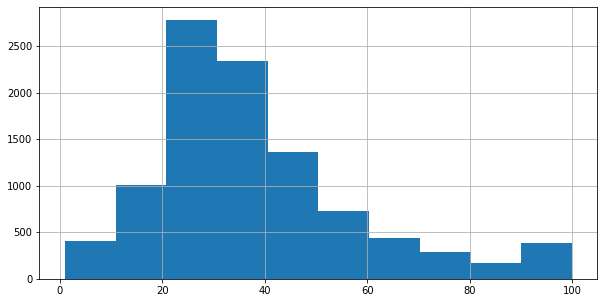

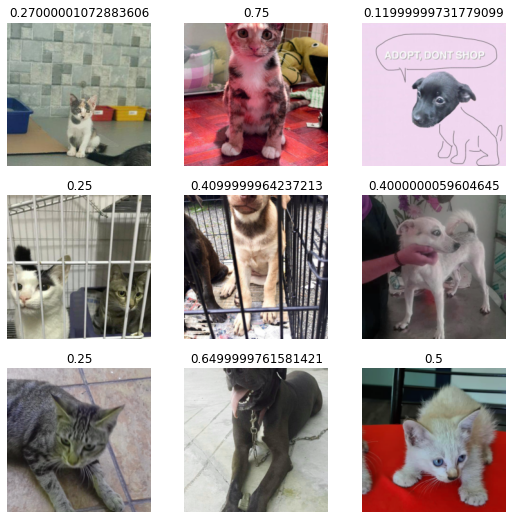

In [13]:
def data_loader(train_df, test_df, train_jpg, test_jpg, dataset_path):
    fastai.vision.all.set_seed(999, reproducible=True)
    train_df['path'] = train_df['Id'].map(lambda x: str(dataset_path + 'train/' + x) + '.jpg')
    train_df = train_df.drop(columns=['Id'])
    train_df = train_df.sample(frac=1).reset_index(drop=True)  # shuffle dataframe
    print(train_df.info(max_cols=train_df.shape[1]))
    train_df['Pawpularity'].hist(figsize=(10, 5))
    print(f"The mean Pawpularity score is {train_df['Pawpularity'].mean()}")
    print(f"The median Pawpularity score is {train_df['Pawpularity'].median()}")
    print(f"The standard deviation of the Pawpularity score is {train_df['Pawpularity'].std()}")
    print(f"There are {len(train_df['Pawpularity'].unique())} unique values of Pawpularity score")
    train_df['norm_score'] = train_df['Pawpularity'] / 100
    print(train_df['norm_score'])
    im = fastai.vision.all.Image.open(train_df['path'][1])
    width, height = im.size
    print(width, height)
    dls2 = fastai.vision.all.ImageDataLoaders.from_df(train_df,  # pass in train DataFrame
                                                     valid_pct=0.2,  # 80-20 train-validation random split
                                                     seed=999,  # seed
                                                     fn_col='path',
                                                     # filename/path is in the second column of the
                                                     # DataFrame
                                                     label_col='norm_score',
                                                     # label is in the first column of the DataFrame
                                                     y_block=fastai.vision.all.RegressionBlock,
                                                     # The type of target
                                                     bs=32,  # pass in batch size
                                                     num_workers=8,
                                                     item_tfms=fastai.vision.all.Resize(224),
                                                     # pass in item_tfms
                                                     batch_tfms=fastai.vision.all.setup_aug_tfms(
                                                         [fastai.vision.all.Brightness(),
                                                          fastai.vision.all.Contrast(),
                                                          fastai.vision.all.Hue(),
                                                          fastai.vision.all.Saturation()]))
    dls2.show_batch()


train_df, test_df, train_jpg, train_df, path = file_loader()
data_loader(train_df, test_df, train_jpg, train_df, path)

In [11]:
def main():
    train_df, test_df, train_jpg, train_df, path = file_loader()
    data_loader(train_df, test_df, train_jpg, train_df, path)

